In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
pd.set_option('display.width', 120)

In [15]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.download(ticker, start="2018-01-01", end="2024-08-28")

data = data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Open"

In [18]:
train_end_date = pd.to_datetime("2023-06-30")
validate_start_date = pd.to_datetime("2023-07-01")
validate_end_date = pd.to_datetime("2024-06-30")
test_start_date = pd.to_datetime("2024-07-01")
test_end_date = pd.to_datetime("2024-08-27")

In [19]:
data_train = data[(data["Date"] <= train_end_date)][features]
data_train_dates = data[(data["Date"] <= train_end_date)]["Date"]

data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]

data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]


In [20]:
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1383, 6)
Validation Set: (250, 6)
Testing Set: (41, 6)


In [21]:
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close  Adj Close     Volume
0  42.540001  43.075001  42.314999  43.064999  40.568932  102223600
1  43.132500  43.637501  42.990002  43.057499  40.561859  118071600
2  43.134998  43.367500  43.020000  43.257500  40.750267   89738400
3  43.360001  43.842499  43.262501  43.750000  41.214222   94640000
4  43.587502  43.902500  43.482498  43.587502  41.061142   82271200
Validation Dataset:
            Open        High         Low       Close   Adj Close    Volume
1383  193.779999  193.880005  191.759995  192.460007  191.221954  31458200
1384  191.570007  192.979996  190.619995  191.330002  190.099228  46920300
1385  189.839996  192.020004  189.199997  191.809998  190.576141  45094300
1386  191.410004  192.669998  190.240005  190.679993  189.453400  46778000
1387  189.259995  189.990005  187.039993  188.610001  187.396729  59922200
Testing Dataset:
            Open        High         Low       Close   Adj Close    Volume
1633  212.08

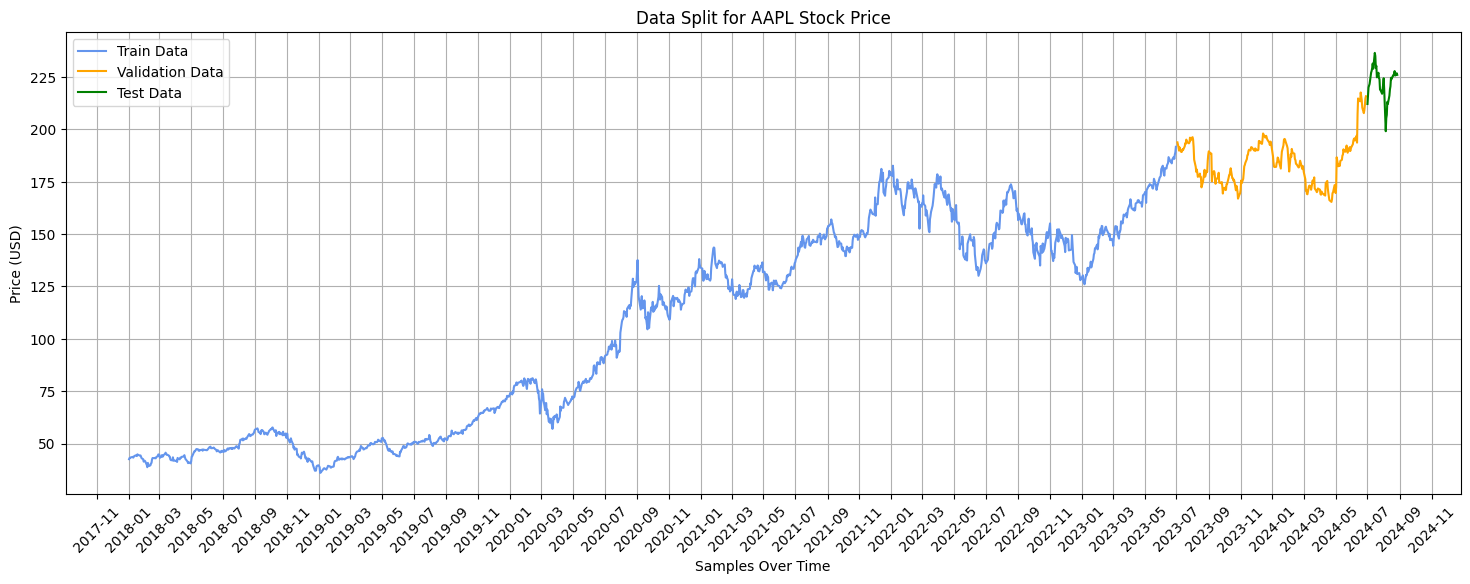

In [22]:
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for AAPL Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

In [23]:
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,118.535391,119.858659,117.311664,118.642997,116.805769,1.028540e+08
std,54.785063,55.322001,54.282408,54.829010,55.201924,5.479046e+07
min,35.994999,36.430000,35.500000,35.547501,33.989895,2.404830e+07
25%,55.541249,56.061874,54.876250,55.684999,53.322523,6.622050e+07
50%,131.055000,132.459999,129.474998,131.125000,128.850479,8.905775e+07
75%,165.777504,167.817505,164.399994,165.832497,164.115517,1.239437e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,4.265100e+08


In [24]:
sc = MinMaxScaler(feature_range=(0,1))

data_train_scaled = sc.fit_transform(data_train)
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

In [25]:
scaler_model_location = './model/'
scaler_model_name = 'aapl_stock_price_recent_scaler'
scaler_model_ext = '.gz'

In [26]:
joblib.dump(sc, scaler_model_location + scaler_model_name + scaler_model_ext)

['./model/aapl_stock_price_recent_scaler.gz']

In [27]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [28]:
# Prepare datasets files and location
data_file_location = "./data/"
data_file_name_train = "aapl_stock_price_processed_train"
data_file_name_validate = "aapl_stock_price_processed_validate"
data_file_name_test = "aapl_stock_price_processed_test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)

In [29]:
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
import joblib
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [30]:
data_file_location = "./data/"
data_file_name_train = "aapl_stock_price_processed_train"
data_file_name_validate = "aapl_stock_price_processed_validate"
data_file_name_test = "aapl_stock_price_processed_test"
data_file_ext = "csv"

# Load data files
data_train_df = pd.read_csv(data_file_location + data_file_name_train + "." + data_file_ext)
data_validate_df = pd.read_csv(data_file_location + data_file_name_validate + "." + data_file_ext)
data_test_df = pd.read_csv(data_file_location + data_file_name_test + "." + data_file_ext)

In [31]:
print(f"Training Dataset Shape: {data_train_df.shape}")
print(f"Validation Dataset Shape: {data_validate_df.shape}")
print(f"Testing Dataset Shape: {data_test_df.shape}")

Training Dataset Shape: (1383, 7)
Validation Dataset Shape: (250, 7)
Testing Dataset Shape: (41, 7)


In [32]:
print("Training Dataset:")
print(data_train_df.head())
print("Validation Dataset:")
print(data_validate_df.head())
print("Testing Dataset:")
print(data_test_df.head())

Training Dataset:
       Open      High       Low     Close  Adj Close    Volume        Date
0  0.042054  0.042044  0.043753  0.047452   0.041447  0.171289  2018-01-02
1  0.045861  0.045603  0.048087  0.047405   0.041403  0.211788  2018-01-03
2  0.045877  0.043894  0.048279  0.048667   0.042590  0.139383  2018-01-04
3  0.047322  0.046900  0.049836  0.051776   0.045513  0.151909  2018-01-05
4  0.048784  0.047279  0.051249  0.050750   0.044548  0.120301  2018-01-08
Validation Dataset:
       Open      High       Low     Close  Adj Close    Volume        Date
0  1.013814  0.996204  1.003210  0.990469   0.990548 -0.009552  2023-07-03
1  0.999614  0.990509  0.995891  0.983336   0.983475  0.029962  2023-07-05
2  0.988499  0.984435  0.986775  0.986366   0.986480  0.025295  2023-07-06
3  0.998586  0.988548  0.993452  0.979233   0.979407  0.029598  2023-07-07
4  0.984772  0.971591  0.972907  0.966166   0.966450  0.063188  2023-07-10
Testing Dataset:
       Open      High       Low     Close  Ad

In [33]:
data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

In [34]:
data_train_dates = data_train_df["Date"]
data_validate_dates = data_validate_df["Date"]
data_test_dates = data_test_df["Date"]

In [35]:
features = ["Open", "High", "Low",	"Close","Adj Close", "Volume"]

data_train_scaled = data_train_df[features].values
data_validate_scaled = data_validate_df[features].values
data_test_scaled = data_test_df[features].values

In [36]:
def construct_model_data(data, sequence_size, target_attr_idx):
    x = []
    y = []
    for i in range(sequence_size, len(data)):

        x.append(data[i-sequence_size:i])
        y.append(data[i, target_attr_idx])

    return np.array(x), np.array(y)

In [37]:
sequence_size = 32

x_train, y_train = construct_model_data(data_train_scaled, sequence_size, 0)

In [38]:
# Combine scaled datasets all together
data_all_scaled = np.concatenate([data_train_scaled, data_validate_scaled, data_test_scaled], axis=0)

# Calculate data size
train_size = len(data_train_scaled)
validate_size = len(data_validate_scaled)
test_size = len(data_test_scaled)

# Construct validation dataset
X_validate, y_validate = construct_model_data(data_all_scaled[train_size-sequence_size:train_size+validate_size,:], sequence_size, 0)

# Construct testing dataset
X_test, y_test = construct_model_data(data_all_scaled[-(test_size+sequence_size):,:], sequence_size, 0)

In [39]:
print(f"Full Scaled Data: {data_all_scaled.shape}")
print(f"\n Data Train Scaled: {data_train_scaled.shape}")
print(f"> Data Train X: {x_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")

Full Scaled Data: (1674, 6)

 Data Train Scaled: (1383, 6)
> Data Train X: (1351, 32, 6)
> Data Train y: (1351,)

 Data Validate Scaled: (250, 6)
> Data Validate X: (250, 32, 6)
> Data Validate y: (250,)

 Data Test Scaled: (41, 6)
> Data Test X: (41, 32, 6)
> Data Test y: (41,)


In [40]:
regressor = Sequential()

In [41]:
regressor.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

In [42]:
regressor.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=32))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [43]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [44]:
model_location = "../model/"
model_name = "aapl_stock_price_lstm.model.keras"
best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name,
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=0)

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = regressor.fit(
    x = x_train,
    y = y_train,
    validation_data=(X_validate, y_validate),
    epochs=160,
    batch_size = 32,
    callbacks = [early_stopping,best_model_checkpoint_callback])

Epoch 1/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 1.0798 - val_loss: 0.6354
Epoch 2/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.5414 - val_loss: 0.3278
Epoch 3/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.2787 - val_loss: 0.1625
Epoch 4/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.1410 - val_loss: 0.0873
Epoch 5/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0743 - val_loss: 0.0496
Epoch 6/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0410 - val_loss: 0.0286
Epoch 7/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0276 - val_loss: 0.0242
Epoch 8/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0195 - val_loss: 0.0212
Epoch 9/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0156 - val_loss: 0.0170
Epoch 10/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 11/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0109 - val_loss: 0.0116
Epoch 12/160
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/ste

In [46]:
regressor.save("./model/aapl_stock_price_lstm_model.h5")

In [47]:
from keras.models import load_model

model = load_model("./model/aapl_stock_price_lstm_model.h5")

In [48]:
y_train_predict = model.predict(x_train)
y_validate_predict = model.predict(X_validate)
y_test_predict = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [49]:
y_train_predict.shape

(1351, 1)

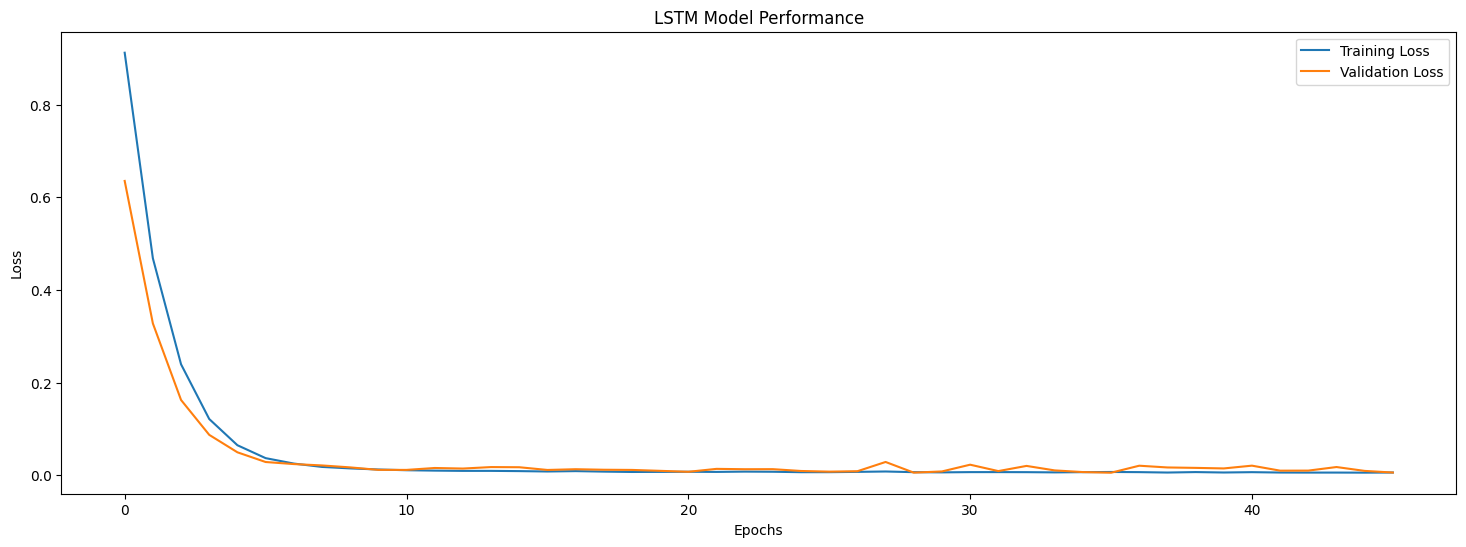

In [50]:
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [51]:
scaler_model_location = "./model/"
scaler_model_name = "aapl_stock_price_recent_scaler"
scaler_model_ext = "gz"

# Store the scaler model
sc = joblib.load(scaler_model_location + scaler_model_name + "." + scaler_model_ext)

In [52]:
y_train_inv = sc.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.ones((len(y_train.reshape(-1,1)), 5))), axis=1))[:,0]
y_validate_inv = sc.inverse_transform(np.concatenate((y_validate.reshape(-1,1), np.ones((len(y_validate.reshape(-1,1)), 5))), axis=1))[:,0]
y_test_inv = sc.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.ones((len(y_test.reshape(-1,1)), 5))), axis=1))[:,0]

y_train_predict_inv = sc.inverse_transform(np.concatenate((y_train_predict, np.ones((len(y_train_predict), 5))), axis=1))[:,0]
y_validate_predict_inv = sc.inverse_transform(np.concatenate((y_validate_predict, np.ones((len(y_validate_predict), 5))), axis=1))[:,0]
y_test_predict_inv = sc.inverse_transform(np.concatenate((y_test_predict, np.ones((len(y_test_predict), 5))), axis=1))[:,0]

In [53]:
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
test_actual_color = "green"
train_predicted_color = "red"
validate_predicted_color = "red"
test_predicted_color = "red"

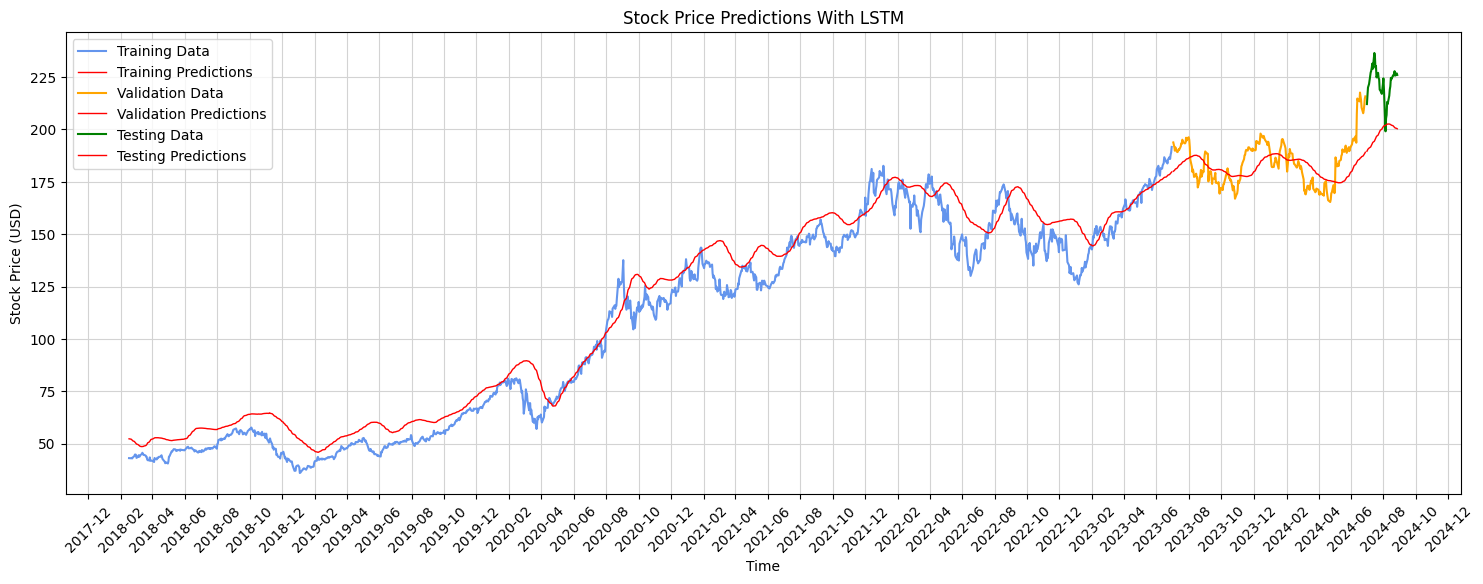

In [54]:
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[sequence_size:,], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:,], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

plt.title("Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")